In [17]:
import pandas as pd
import numpy as np
import pickle
import scanpy as sp
import sys
sys.path.append('../GENIE3/GENIE3_python/')
from GENIE3 import GENIE3
from matplotlib import pyplot as plt

In [7]:
with open('../Data/GSE60361_C1-3005-Expression.txt.gz', 'rb') as f:
    data = pd.read_table(f, compression='gzip')

data

,cell_id,1772071015_C02,1772071017_G12,1772071017_A05,1772071014_B06,1772067065_H06,1772071017_E02,1772067065_B07,1772067060_B09,1772071014_E04,...,1772066110_D12,1772071017_A07,1772063071_G10,1772058148_C03,1772063061_D09,1772067059_B04,1772066097_D04,1772063068_D01,1772066098_A12,1772058148_F03
0,Tspan12,0,0,0,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Tshz1,3,1,0,2,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
2,Fnbp1l,3,1,6,4,1,2,1,0,5,...,0,0,0,0,0,0,0,0,0,0
3,Adamts15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cldn12,1,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,Gm20738_loc4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19968,Gm20738_loc6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19969,Gm21943_loc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19970,Gm21943_loc3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = data.set_index('cell_id')
data = data.transpose()
data = data.drop(columns=['Mar-01', 'Mar-02'], axis=1)
data

cell_id,Tspan12,Tshz1,Fnbp1l,Adamts15,Cldn12,Rxfp1,2310042E22Rik,Sema3c,Jam2,Apbb1ip,...,Gm20826_loc1,Gm20826_loc2,Gm20877_loc2,Gm20877_loc1,Gm20865_loc4,Gm20738_loc4,Gm20738_loc6,Gm21943_loc1,Gm21943_loc3,Gm20738_loc3
1772071015_C02,0,3,3,0,1,0,0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1772071017_G12,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772071017_A05,0,0,6,0,1,0,2,25,1,0,...,0,0,0,0,0,0,0,0,0,0
1772071014_B06,3,2,4,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1772067065_H06,0,2,1,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772067059_B04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772066097_D04,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1772063068_D01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772066098_A12,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
exp_matrix = data.to_numpy()
exp_matrix.shape

(3005, 19968)

In [16]:
# Order genes by expression
global_gene_exp = []

for gene in data.columns:
    global_gene_exp.append({gene : data[gene].sum()})

    
sorted_genes = sorted(global_gene_exp, reverse=True, key=lambda item : list(item.values())[0])
sorted_genes

[{'Malat1': np.int64(2200118)},
 {'Plp1': np.int64(494321)},
 {'Calm1': np.int64(235312)},
 {'Calm2': np.int64(189139)},
 {'Meg3': np.int64(165068)},
 {'Ppia': np.int64(154517)},
 {'Tmsb4x': np.int64(148524)},
 {'Hsp90ab1': np.int64(145308)},
 {'Hsp90aa1': np.int64(144150)},
 {'Fth1': np.int64(127159)},
 {'Actb': np.int64(117989)},
 {'App': np.int64(117427)},
 {'Atp1b1': np.int64(108553)},
 {'Atp2b1': np.int64(105256)},
 {'Trf': np.int64(102322)},
 {'Tuba1a': np.int64(96877)},
 {'Snap25': np.int64(89008)},
 {'Mal': np.int64(86739)},
 {'Gpm6a': np.int64(84352)},
 {'Gria2': np.int64(80040)},
 {'Actg1': np.int64(75491)},
 {'Cst3': np.int64(74297)},
 {'Syt1': np.int64(73722)},
 {'Slc25a4': np.int64(70860)},
 {'Rtn1': np.int64(70356)},
 {'Aldoa': np.int64(70171)},
 {'Cpe': np.int64(70130)},
 {'Snhg11': np.int64(67501)},
 {'Rps29': np.int64(67454)},
 {'Mdh1': np.int64(67453)},
 {'Itm2b': np.int64(66188)},
 {'Ppp3ca': np.int64(63498)},
 {'Prkcb': np.int64(61529)},
 {'Ttc3': np.int64(61349)},


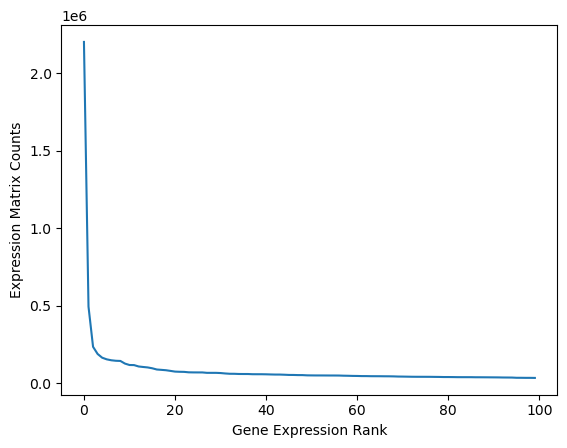

In [26]:
# Gene expression plot of top 100 genes
plt.plot(range(len(sorted_genes[:100])), [list(item.values())[0] for item in sorted_genes[:100]])
plt.xlabel('Gene Expression Rank')
plt.ylabel('Expression Matrix Counts')
plt.show()

In [29]:
top_100_gene_names = [list(gene.keys())[0] for gene in sorted_genes[:100]]
top_100_gene_names

['Malat1',
 'Plp1',
 'Calm1',
 'Calm2',
 'Meg3',
 'Ppia',
 'Tmsb4x',
 'Hsp90ab1',
 'Hsp90aa1',
 'Fth1',
 'Actb',
 'App',
 'Atp1b1',
 'Atp2b1',
 'Trf',
 'Tuba1a',
 'Snap25',
 'Mal',
 'Gpm6a',
 'Gria2',
 'Actg1',
 'Cst3',
 'Syt1',
 'Slc25a4',
 'Rtn1',
 'Aldoa',
 'Cpe',
 'Snhg11',
 'Rps29',
 'Mdh1',
 'Itm2b',
 'Ppp3ca',
 'Prkcb',
 'Ttc3',
 'Dynll1',
 'Ndufa4',
 'Syt11',
 'Serinc1',
 'Scg5',
 'Sub1',
 'Chn1',
 'Tubb2a',
 'Gstp1',
 'Apod',
 'Stmn3',
 'Hspa8',
 'Cox8a',
 'Sparcl1',
 'Ywhaz',
 'Usmg5',
 'Lars2',
 'Mbp',
 'Nrgn',
 'Sst',
 'Atp6v0c-ps2',
 'Atp6v1a',
 '2900097C17Rik',
 'Map1b',
 'Cox7c',
 'Snca',
 'Aplp1',
 'Ckb',
 'Enpp2',
 'Prnp',
 'Eif4a2',
 'Rplp1',
 'Ttr',
 'Mog',
 'Eef1a1',
 'Calm3',
 'Scd2',
 'Cox6b1',
 'Npy',
 'Atp5b',
 'Cox7a2',
 'Gnas',
 'Car2',
 'Cd81',
 'Fkbp1a',
 'Cox6c',
 'Gpm6b',
 'Ddx5',
 'Tcf4',
 'Cox4i1',
 'Basp1',
 'Tpi1',
 'Kif1b',
 'Cycs',
 'Ptma',
 'Stmn2',
 'Sep-07',
 'Atp5g3',
 'Hpca',
 'Ptgds',
 'Olfm1',
 'Son',
 'Pja2',
 'Fau',
 'Slc1a2',
 'Cnp']

In [35]:
top_100_gene_matrix = data[[gene for gene in top_100_gene_names]].to_numpy()
top_100_gene_matrix.shape

(3005, 100)

In [38]:
len(top_100_gene_matrix[:10])

10

In [39]:
# Run GENIE3

GENIE3(top_100_gene_matrix[:, :10], gene_names=top_100_gene_names[:10])

Tree method: RF
K: sqrt
Number of trees: 1000


running single threaded jobs
Gene 1/10...
Gene 2/10...
Gene 3/10...
Gene 4/10...
Gene 5/10...
Gene 6/10...
Gene 7/10...
Gene 8/10...
Gene 9/10...
Gene 10/10...
Elapsed time: 84.88 seconds


array([[0.        , 0.16686395, 0.01290545, 0.02375771, 0.1516734 ,
        0.03136364, 0.04894927, 0.03285242, 0.03405521, 0.06614876],
       [0.22144676, 0.        , 0.01427848, 0.0259151 , 0.07888096,
        0.02218749, 0.04254474, 0.01635519, 0.02406832, 0.32869236],
       [0.07777168, 0.10141286, 0.        , 0.3684316 , 0.10638679,
        0.39118801, 0.12033024, 0.1957676 , 0.2042003 , 0.07446593],
       [0.07877697, 0.13522452, 0.33365154, 0.        , 0.13646398,
        0.17435422, 0.23942948, 0.13599094, 0.10684168, 0.08837585],
       [0.09315185, 0.08464911, 0.05457565, 0.05648983, 0.        ,
        0.05276916, 0.03892224, 0.08666024, 0.07786904, 0.03888506],
       [0.05333746, 0.04550472, 0.26287494, 0.18410381, 0.13996011,
        0.        , 0.1737009 , 0.05931416, 0.06407815, 0.09702761],
       [0.14558228, 0.07108054, 0.03369992, 0.09624764, 0.06221802,
        0.11094424, 0.        , 0.04390519, 0.03514454, 0.20470623],
       [0.14150383, 0.05029751, 0.1389331